In [128]:
import pandas as pd
import numpy as np
import seaborn as sns

# CARGA DE DATOS

In [163]:
bikes = pd.read_csv('../data/bike_buyers.csv')

# INSPECCIÓN DE DATOS

In [165]:
bikes.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [166]:
bikes['ID'].nunique()

1000

**SE VALIDÓ QUE TODO LOS ID's SON ÚNICOS PARA ESTABLECERLO COMO INDICES EN EL DATAFRAME**

In [132]:
bikes.set_index('ID',inplace=True)

In [133]:
bikes.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
ID,,,,,,,,,,,,
12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [134]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 12496 to 12121
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Marital Status    993 non-null    object 
 1   Gender            989 non-null    object 
 2   Income            994 non-null    float64
 3   Children          992 non-null    float64
 4   Education         1000 non-null   object 
 5   Occupation        1000 non-null   object 
 6   Home Owner        996 non-null    object 
 7   Cars              991 non-null    float64
 8   Commute Distance  1000 non-null   object 
 9   Region            1000 non-null   object 
 10  Age               992 non-null    float64
 11  Purchased Bike    1000 non-null   object 
dtypes: float64(4), object(8)
memory usage: 101.6+ KB


**SE IDENTIFICAN DATOS NULOS EN LAS SIGUIENTES VARIABLES: *MARITAL STATUS*, *GENDER*, *INCOME*, *CHILDREN*, *HOME OWNER*, *CATS AGE***

In [135]:
bikes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,994.0,56267.605634,31067.817462,10000.0,30000.0,60000.0,70000.0,170000.0
Children,992.0,1.910282,1.626910,0.0,0.0,2.0,3.0,5.0
Cars,991.0,1.455096,1.121755,0.0,1.0,1.0,2.0,4.0
Age,992.0,44.181452,11.362007,25.0,35.0,43.0,52.0,89.0


***TABLAS DE FRECUENCIA***

In [136]:
bikes['Children'].value_counts(dropna=False).sort_index()

0.0    274
1.0    169
2.0    209
3.0    133
4.0    126
5.0     81
NaN      8
Name: Children, dtype: int64

In [137]:
bikes['Cars'].value_counts(dropna=False).sort_index()

0.0    238
1.0    267
2.0    342
3.0     85
4.0     59
NaN      9
Name: Cars, dtype: int64

In [138]:
bikes['Marital Status'].value_counts(dropna=False)

Married    535
Single     458
NaN          7
Name: Marital Status, dtype: int64

In [139]:
bikes['Gender'].value_counts(dropna=False)

Male      500
Female    489
NaN        11
Name: Gender, dtype: int64

In [140]:
bikes['Education'].value_counts(dropna=False)

Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: Education, dtype: int64

In [141]:
bikes['Occupation'].value_counts(dropna=False)

Professional      276
Skilled Manual    255
Clerical          177
Management        173
Manual            119
Name: Occupation, dtype: int64

In [144]:
bikes['Home Owner'].value_counts(dropna=False)

Yes    682
No     314
NaN      4
Name: Home Owner, dtype: int64

In [146]:
bikes['Commute Distance'].value_counts(dropna=False)

0-1 Miles     366
5-10 Miles    192
1-2 Miles     169
2-5 Miles     162
10+ Miles     111
Name: Commute Distance, dtype: int64

In [149]:
bikes['Region'].value_counts(dropna=False)

North America    508
Europe           300
Pacific          192
Name: Region, dtype: int64

In [151]:
bikes['Purchased Bike'].value_counts(dropna=False)

No     519
Yes    481
Name: Purchased Bike, dtype: int64

In [153]:
bikes['Age'].value_counts(dropna=False).sort_index()

25.0     5
26.0    16
27.0    23
28.0    22
29.0    16
30.0    26
31.0    25
32.0    33
33.0    21
34.0    31
35.0    35
36.0    37
37.0    32
38.0    37
39.0    22
40.0    40
41.0    28
42.0    34
43.0    36
44.0    27
45.0    31
46.0    27
47.0    39
48.0    29
49.0    23
50.0    23
51.0    22
52.0    25
53.0    24
54.0    16
55.0    17
56.0    16
57.0     8
58.0    12
59.0    20
60.0    14
61.0     9
62.0    13
63.0     9
64.0    10
65.0     9
66.0    14
67.0    10
68.0     3
69.0     8
70.0     4
71.0     1
72.0     1
73.0     4
74.0     1
78.0     2
80.0     1
89.0     1
NaN      8
Name: Age, dtype: int64

***LIMPIEZA DE DATOS EN CHILDREN***

In [154]:
#Validamos si todos los datos NO NULOS almacenados en la columna Children son enteros. A pesar del su tipo de dato
Children_is_integer = np.isclose(bikes[bikes['Children'].isnull()==False]['Children'], bikes[bikes['Children'].isnull()==False]['Children'].astype(int)).all()
print(Children_is_integer)

True


In [155]:
#Reemplazamos los valores nulos en la columna Children por su mediana
bikes['Children'].fillna(value = bikes['Children'].median(), inplace=True)

***LIMPIEZA DE DATOS EN CARS***

In [156]:
#Validamos si todos los datos NO NULOS almacenados en la columna Cars son enteros. A pesar del su tipo de dato
Cars_is_integer = np.isclose(bikes[bikes['Cars'].isnull()==False]['Cars'], bikes[bikes['Cars'].isnull()==False]['Cars'].astype(int)).all()
print(Cars_is_integer)

True


In [157]:
#Reemplazamos los valores nulos en la columna Cars por su mediana
bikes['Cars'].fillna(value = bikes['Cars'].median(),inplace=True)

***LIMPIEZA DE DATOS AGE***

In [69]:
#Validamos si todos los datos NO NULOS almacenados en la columna Age son enteros. A pesar del su tipo de dato
Age_is_integer = np.isclose(bikes[bikes['Age'].isnull()==False]['Age'], bikes[bikes['Age'].isnull()==False]['Age'].astype(int)).all()
print(Age_is_integer)

True


In [160]:
bikes['Age'].fillna(value = bikes['Age'].median(), inplace=True)

***LIMPIEZA DE DATOS INCOME***

In [158]:
#Validamos si todos los datos NO NULOS almacenados en la columna Income son enteros. A pesar del su tipo de dato
Income_is_integer = np.isclose(bikes[bikes['Income'].isnull()==False]['Income'], bikes[bikes['Income'].isnull()==False]['Income'].astype(int)).all()
print(Income_is_integer)

True


In [161]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 12496 to 12121
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Marital Status    993 non-null    object 
 1   Gender            989 non-null    object 
 2   Income            994 non-null    float64
 3   Children          1000 non-null   float64
 4   Education         1000 non-null   object 
 5   Occupation        1000 non-null   object 
 6   Home Owner        996 non-null    object 
 7   Cars              1000 non-null   float64
 8   Commute Distance  1000 non-null   object 
 9   Region            1000 non-null   object 
 10  Age               1000 non-null   float64
 11  Purchased Bike    1000 non-null   object 
dtypes: float64(4), object(8)
memory usage: 101.6+ KB


<AxesSubplot: >

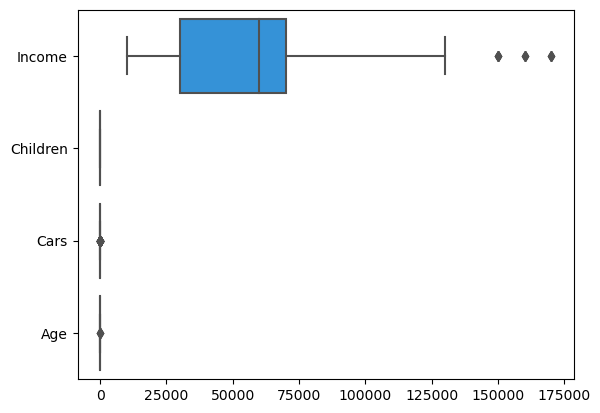

In [72]:
sns.boxplot(data=bikes, palette = 'rainbow', orient= 'h')

Text(0, 0.5, 'Total de Niños')

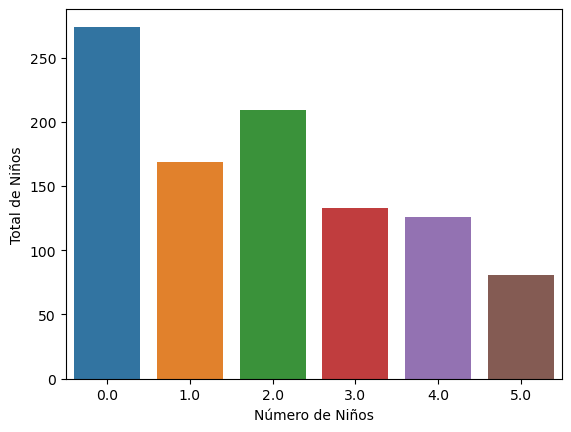

In [89]:
sns.countplot(x='Children', data = bikes)
plt.xlabel('Número de Niños')
plt.ylabel('Total de Niños')

In [91]:
bikes['Children'].median()

2.0